#### Effect of hyperparameters in MiniBatchKMeans
Parameters to be studied in the algorithm

- `n_clusters`: Number of clusters.
- `batch_size`: Size of mini-batches.
- `max_iter`: Maximum number of iterations.

In [1]:
import sys
import pandas as pd
sys.path.insert(0, "../")

from src.clustering.hyperparameters import ClusteringHyperparameters
from src.clustering.select_partition import BestPartition
from src.clustering.clusters_visualized import ViewGroups

In [2]:
df_data = pd.read_csv("../results/preprocessing/05_dataset_scaled_robust.csv")
df_labels = pd.read_csv("../results/preprocessing/labels.csv")

analysis = ClusteringHyperparameters(df_data=df_data, 
                                     df_labels=df_labels)

param_grid = {
    "n_clusters": [3, 4, 5, 8],
    "batch_size": [50, 100, 200],
    "max_iter": [100, 200, 300]
}
analysis.run_minibatch_kmeans(param_grid)
analysis.save_results(performance_path="../results/clustering/performances_effect_hyperparameters.csv", 
                      labels_path="../results/clustering/labels_effect_hyperparameters.csv")

Running minibatch_kmeans_{'batch_size': 50, 'max_iter': 100, 'n_clusters': 3}
Running minibatch_kmeans_{'batch_size': 50, 'max_iter': 100, 'n_clusters': 4}
Running minibatch_kmeans_{'batch_size': 50, 'max_iter': 100, 'n_clusters': 5}
Running minibatch_kmeans_{'batch_size': 50, 'max_iter': 100, 'n_clusters': 8}
Running minibatch_kmeans_{'batch_size': 50, 'max_iter': 200, 'n_clusters': 3}
Running minibatch_kmeans_{'batch_size': 50, 'max_iter': 200, 'n_clusters': 4}
Running minibatch_kmeans_{'batch_size': 50, 'max_iter': 200, 'n_clusters': 5}
Running minibatch_kmeans_{'batch_size': 50, 'max_iter': 200, 'n_clusters': 8}
Running minibatch_kmeans_{'batch_size': 50, 'max_iter': 300, 'n_clusters': 3}
Running minibatch_kmeans_{'batch_size': 50, 'max_iter': 300, 'n_clusters': 4}
Running minibatch_kmeans_{'batch_size': 50, 'max_iter': 300, 'n_clusters': 5}
Running minibatch_kmeans_{'batch_size': 50, 'max_iter': 300, 'n_clusters': 8}
Running minibatch_kmeans_{'batch_size': 100, 'max_iter': 100, 'n

#### Select best partition

In [3]:
df_performance = pd.read_csv("../results/clustering/performances_effect_hyperparameters.csv")

best = BestPartition(df_performance=df_performance)
filtered_df, best_partition  = BestPartition.select_best_partition(df_performance)
filtered_df

,description,siluetas,calinski,davies,entropy,score
0,"minibatch_kmeans_{'batch_size': 50, 'max_iter'...",0.480967,15750.136971,0.670051,0.780067,15749.167820
1,"minibatch_kmeans_{'batch_size': 50, 'max_iter'...",0.436647,16023.145654,0.717951,0.971807,16021.892543
2,"minibatch_kmeans_{'batch_size': 50, 'max_iter'...",0.397590,16226.929211,0.807183,1.485794,16225.033824
4,"minibatch_kmeans_{'batch_size': 50, 'max_iter'...",0.480967,15750.136971,0.670051,0.780067,15749.167820
5,"minibatch_kmeans_{'batch_size': 50, 'max_iter'...",0.436647,16023.145654,0.717951,0.971807,16021.892543
6,"minibatch_kmeans_{'batch_size': 50, 'max_iter'...",0.397590,16226.929211,0.807183,1.485794,16225.033824
8,"minibatch_kmeans_{'batch_size': 50, 'max_iter'...",0.480967,15750.136971,0.670051,0.780067,15749.167820
9,"minibatch_kmeans_{'batch_size': 50, 'max_iter'...",0.436647,16023.145654,0.717951,0.971807,16021.892543
10,"minibatch_kmeans_{'batch_size': 50, 'max_iter'...",0.397590,16226.929211,0.807183,1.485794,16225.033824
12,"minibatch_kmeans_{'batch_size': 100, 'max_iter...",0.476148,15142.439765,0.669124,0.772947,15141.473842


In [4]:
print(f"Best partition is {best_partition['description']} with score: {best_partition['score']}")

Best partition is minibatch_kmeans_{'batch_size': 50, 'max_iter': 100, 'n_clusters': 5} with score: 16225.033824110265


#### View groups

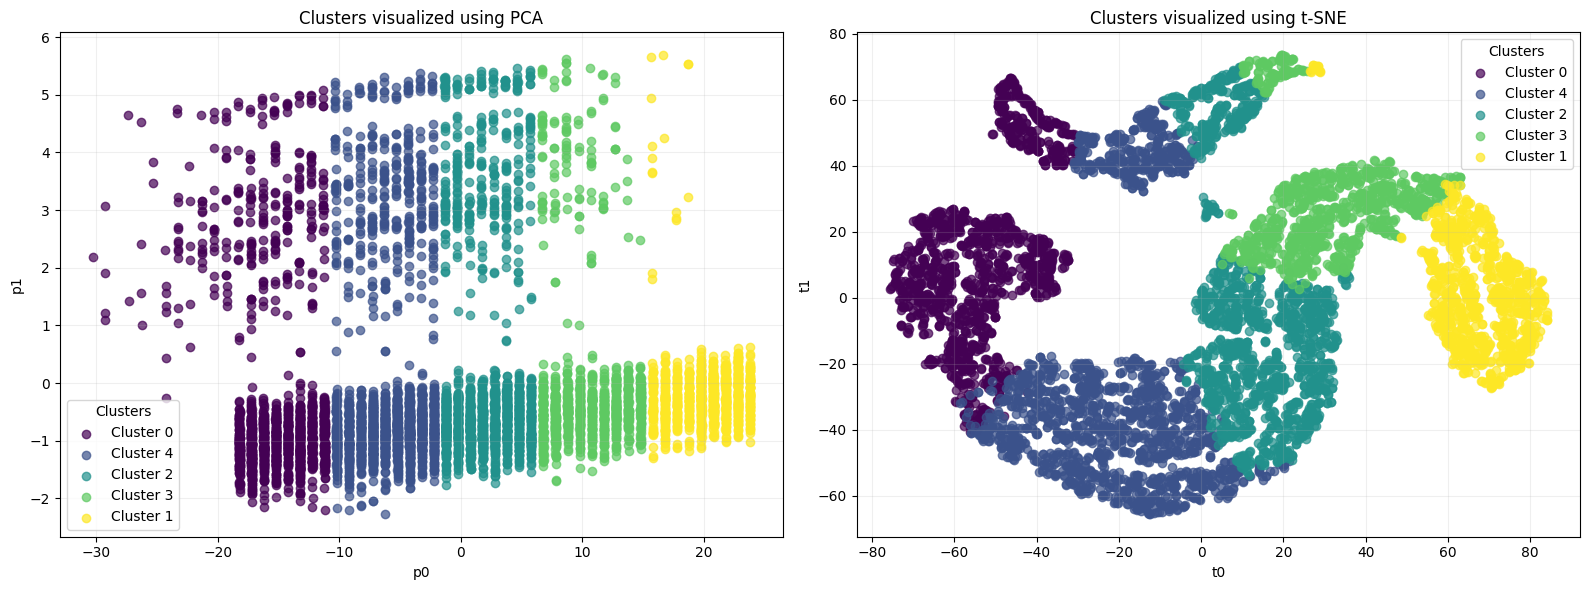

In [5]:
df_values = pd.read_csv("../results/preprocessing/05_dataset_scaled_robust.csv")
df_labels = pd.read_csv("../results/clustering/labels_effect_hyperparameters.csv")

visualized = ViewGroups(df_labels=df_labels, df_values=df_values)
visualized.visualize_best_partition(cluster_column="minibatch_kmeans_{'batch_size': 50, 'max_iter': 100, 'n_clusters': 5}", 
                                    save_path="../results/clustering/best_partition_hyperparameter.png")